In [2]:
#importer les libarairies necassaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [7]:
#stocker le dataset dans le dataFrame df
df = pd.read_csv('/content/train.csv')


In [8]:
#lire les 5 premiers ligne de notre dataFrame
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
#informations general du dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
# Identifier les valeurs nuls
df_null=df.isnull().sum()
df_null

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [11]:
#Remplacer les valeurs maquantes pa
df['Postal Code'].fillna(0,inplace=True)


In [12]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [13]:
#convertir le Code postal en entiers
df['Postal Code']=df['Postal Code'].astype(int)

In [14]:
df['Postal Code'].dtype

dtype('int64')

In [15]:
# resumer Statistique des variable quantitatives
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [16]:
#Verifier s'il existe des doublons
df.duplicated().sum()

0

# Customer Segmentation


In [17]:
#Indentifier les types de clients dans le dataFrame
type_customer=df['Segment'].unique()
print(type_customer)

['Consumer' 'Corporate' 'Home Office']


In [18]:
#Nombre de clients dans chaque types
Number_customer = df['Segment'].value_counts().reset_index()
Number_customer.columns=['Customer Type','Total Customers']
print(Number_customer)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


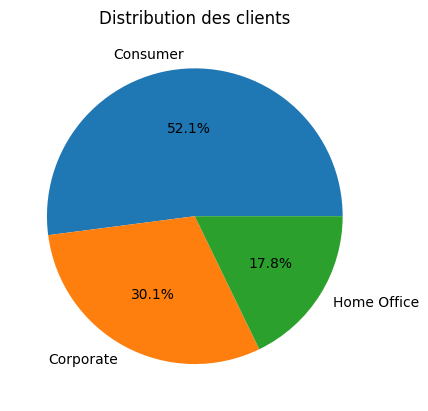

In [19]:
# Diagramme circulaire  pour voir la distributions des types clients et leur valeur total
plt.pie(Number_customer['Total Customers'],labels=Number_customer['Customer Type'],autopct='%1.1f%%')
plt.title('Distribution des clients')
plt.show()

In [20]:
#identifier les ventes par categories
sales_by_category = df.groupby('Segment')['Sales'].sum().reset_index()
sales_by_category.columns=['Customer Type','Total Sales']
sales_by_category

,Customer Type,Total Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


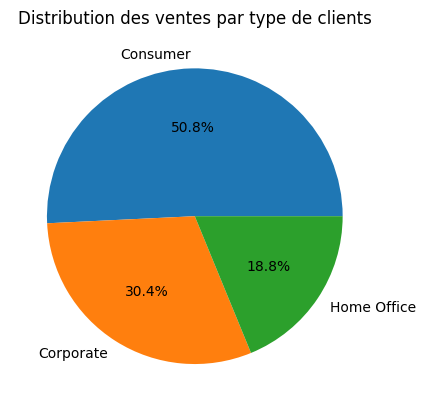

In [21]:
#visualiser les types de clients et les ventes sur un diagramme circulaire
plt.pie(sales_by_category['Total Sales'],labels=sales_by_category['Customer Type'],autopct='%1.1f%%')
plt.title('Distribution des ventes par type de clients')
plt.show()

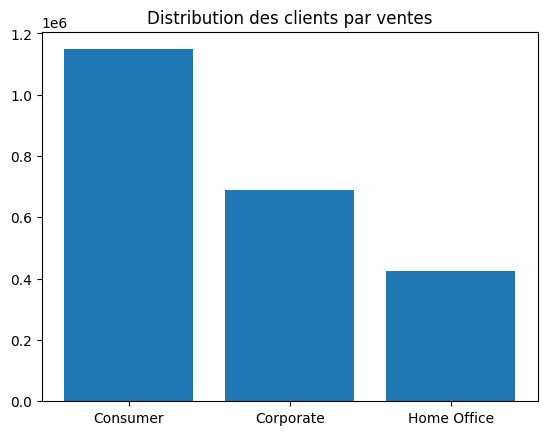

In [22]:
# diagramme en barre
plt.bar(sales_by_category['Customer Type'],sales_by_category['Total Sales'])
plt.title('Distribution des clients par ventes')
plt.show()

In [23]:
#grouper les clients  par:ID,Nom segment et calculer la frequence de leur comandes
Customer_freq_order =df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
#Renommer les colonne
Customer_freq_order.columns=['Customer ID','Customer Name','Customer type','Total Orders']
#Identifier les colonnes repetes
repeat_customer = Customer_freq_order[Customer_freq_order['Total Orders']>1]
#Ordoner les colonnes repete
sorted_repeat_customer =repeat_customer.sort_values(by ='Total Orders',ascending =False)
sorted_repeat_customer.head(10)

,Customer ID,Customer Name,Customer type,Total Orders
787,WB-21850,William Brown,Consumer,35
606,PP-18955,Paul Prost,Home Office,34
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,33
720,SV-20365,Seth Vernon,Consumer,32
349,JD-15895,Jonathan Doherty,Corporate,32
147,CK-12205,Chloris Kastensmidt,Consumer,32
44,AP-10915,Arthur Prichep,Consumer,31
275,EP-13915,Emily Phan,Consumer,31
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [24]:
#grouper les clients  par:ID,Nom segment et vente
Customer_sales =df.groupby(['Customer ID','Customer Name'])['Sales'].sum().reset_index()
#Renommer les colonne
Customer_sales.columns=['Customer ID','Customer type','Total Sales']
#Ordoner les colonnes repete
top_spender =Customer_sales.sort_values(by ='Total Sales',ascending =False)
top_spender.head(10)

,Customer ID,Customer type,Total Sales
700,SM-20320,Sean Miller,25043.050
741,TC-20980,Tamara Chand,19052.218
621,RB-19360,Raymond Buch,15117.339
730,TA-21385,Tom Ashbrook,14595.620
6,AB-10105,Adrian Barton,14473.571
434,KL-16645,Ken Lonsdale,14175.229
669,SC-20095,Sanjit Chand,14142.334
327,HL-15040,Hunter Lopez,12873.298
683,SE-20110,Sanjit Engle,12209.438
131,CC-12370,Christopher Conant,12129.072


In [25]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [26]:
#les type de livraison
type_ship_mode = df['Ship Mode'].unique()
print(type_ship_mode)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [27]:
#Frequence de livraison
shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode.columns=['Mode of Shipping','Use Frequency']
shipping_mode

,Mode of Shipping,Use Frequency
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


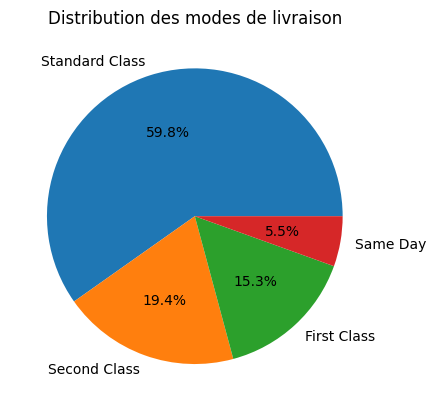

In [28]:
#pie chart
plt.pie(shipping_mode['Use Frequency'],labels=shipping_mode['Mode of Shipping'],autopct='%1.1f%%')
plt.title('Distribution des modes de livraison')
plt.show()

In [29]:
#nombres de clients par Region
state = df['State'].value_counts().reset_index()
state.columns=['State','Number of Customers']
state.head(10)

,State,Number of Customers
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [30]:
#nombres de clients par ville
City = df['City'].value_counts().reset_index()
City.columns=['City','Number of Customers']
City.head(10)

,City,Number of Customers
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


In [31]:
#les ventes par Region
sale_by_state=df.groupby(['State'])['Sales'].sum().reset_index()
sale_by_state.columns=['State','Total Sales']
#par ordre decroissant
sale_by_state = sale_by_state.sort_values(by='Total Sales',ascending=False)
sale_by_state.head()

,State,Total Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500


In [32]:
#les ventes par Ville
sale_by_city=df.groupby(['City'])['Sales'].sum().reset_index()
sale_by_city.columns=['City','Total Sales']
#par ordre decroissant
sale_by_city = sale_by_city.sort_values(by='Total Sales',ascending=False)
sale_by_city.head()

,City,Total Sales
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322
436,San Francisco,109041.120
372,Philadelphia,108841.749


In [33]:
#Les categoryies de produits
product_category = df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


In [34]:
#grouper les sous  categories
sub_category_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
#par ordre decroissant
sub_category_count= sub_category_count.sort_values(by='Sub-Category',ascending=False)
sub_category_count



,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [35]:
#les ventes par Categories
sales_by_category=df.groupby(['Category'])['Sales'].sum().reset_index()
sales_by_category.columns=['Category','Total Sales']
#par ordre decroissant
sales_by_category = sales_by_category.sort_values(by='Total Sales',ascending=False)
sales_by_category.head()

,Category,Total Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


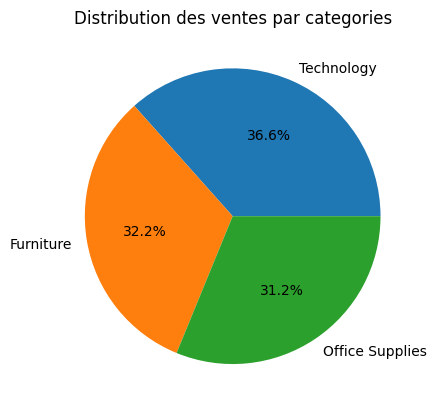

In [36]:
plt.pie(sales_by_category['Total Sales'],labels=sales_by_category['Category'],autopct='%1.1f%%')
plt.title('Distribution des ventes par categories')
plt.show()

In [37]:
#les ventes par sous Categories
sales_by_sub_category=df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
sales_by_sub_category.columns=['Sub-Category','Total Sales']
#par ordre decroissant
sales_by_sub_category = sales_by_sub_category.sort_values(by='Total Sales',ascending=False)
sales_by_sub_category.head()

,Sub-Category,Total Sales
13,Phones,327782.448
5,Chairs,322822.731
14,Storage,219343.392
16,Tables,202810.628
3,Binders,200028.785


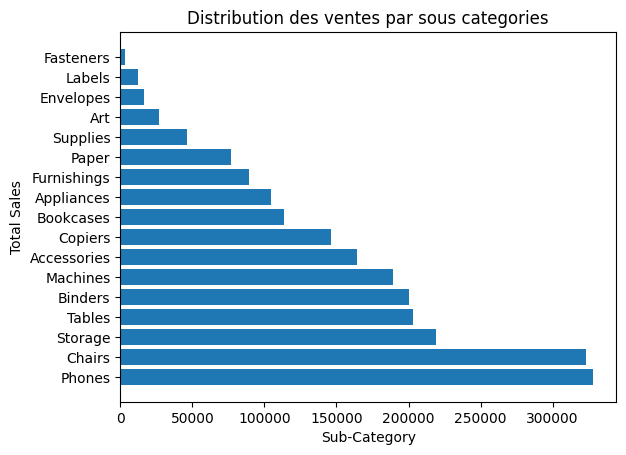

In [38]:
#visualisation des vente par sous categories
plt.barh(sales_by_sub_category['Sub-Category'],sales_by_sub_category['Total Sales'])
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Distribution des ventes par sous categories')
plt.show()

In [39]:
# convertir la date des commandes en datetime
df['Order Date'] =pd.to_datetime(df['Order Date'],format='%d/%m/%Y')

In [40]:
#les vente par an
sales_by_year = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
# Renomer les colonnes
sales_by_year.columns=['Year','Total Sales']
sales_by_year



,Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


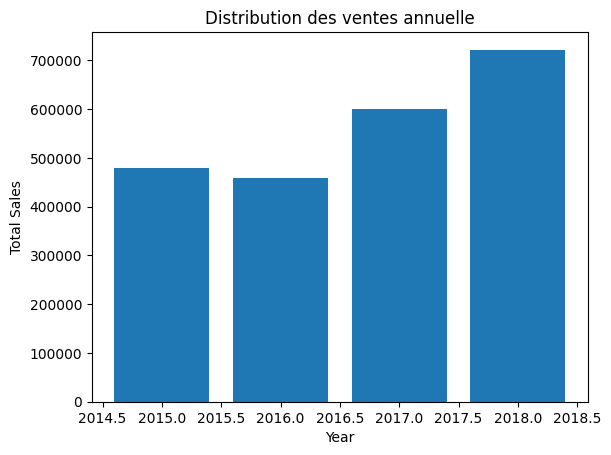

In [41]:
#visualisation des vente par ans
plt.bar(sales_by_year['Year'],sales_by_year['Total Sales'])
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Distribution des ventes annuelle')
plt.show()

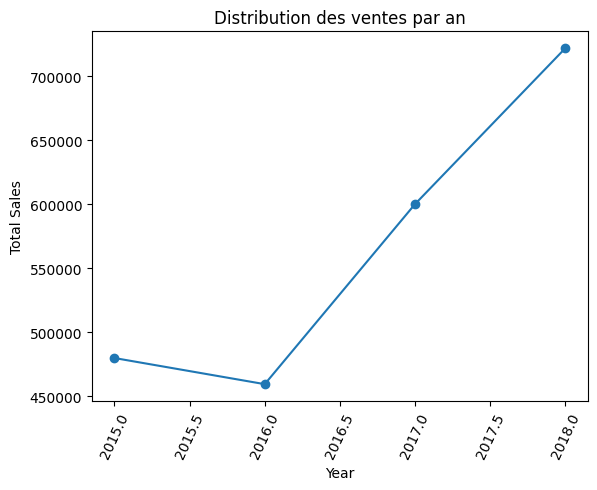

In [42]:
#visualisation des vente par an
plt.plot(sales_by_year['Year'],sales_by_year['Total Sales'],marker='o',linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.title('Distribution des ventes par an')
plt.show()

In [46]:
# convertir la date des commandes en datetime
df['Order Date'] =pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
#filter data par an
year_sales = df[df['Order Date'].dt.year==2017]
#calcul daes quartely ventes
quarterly_sales = year_sales.resample('Q',on='Order Date')['Sales'].sum().reset_index()
# Renomer les colonnes
quarterly_sales.columns=['Quarter','Total Sales']
quarterly_sales

,Quarter,Total Sales
0,2017-03-31,92686.3650
1,2017-06-30,135061.1610
2,2017-09-30,138056.3742
3,2017-12-31,234388.6498


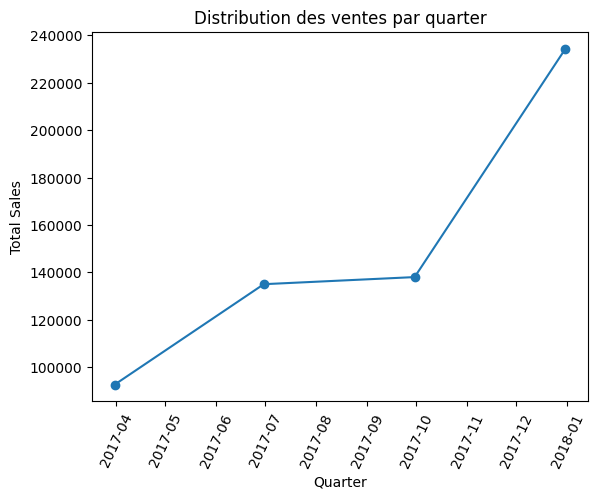

In [47]:
#visualisation des vente par quarter
plt.plot(quarterly_sales['Quarter'],quarterly_sales['Total Sales'],marker='o',linestyle='-')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.title('Distribution des ventes par quarter')
plt.show()

In [49]:
# convertir la date des commandes en datetime
df['Order Date'] =pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
#filter data par an
year_sales = df[df['Order Date'].dt.year==2018]
#Tendance des ventes par mois
monthly_sales = year_sales.resample('M',on='Order Date')['Sales'].sum().reset_index()
# Renomer les colonnes
monthly_sales.columns=['Month','Total Sales']
monthly_sales


,Month,Total Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312


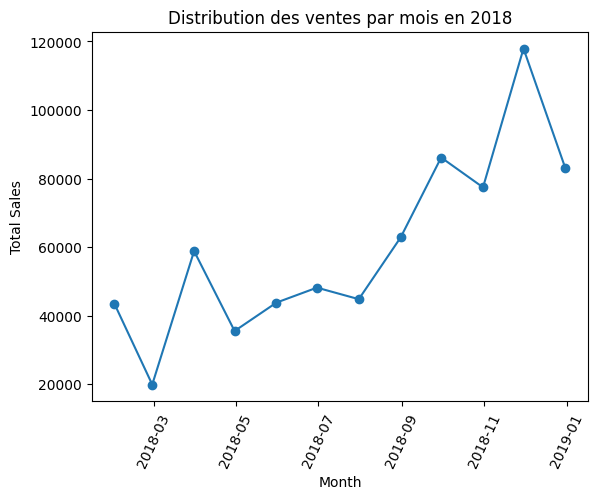

In [52]:
#visualisation des tendances des vente mensuelles
plt.plot(monthly_sales['Month'],monthly_sales['Total Sales'],marker='o',linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.title('Distribution des ventes par mois en 2018')
plt.show()